In [1]:
import endolas
import h5py
import numpy as np
from matplotlib import pyplot as plt
import imageio
from skimage import io
from skimage import color
import skimage

Segmentation Models: using `tf.keras` framework.


In [2]:
plt.rcParams['figure.figsize'] = (15, 15)

In [3]:
path_val='/home/julian/Documents/Studium/MT-Masterarbeit/Data/LASTEN2/validation'
path_test='/home/julian/Documents/Studium/MT-Masterarbeit/Data/LASTEN2/test'
path_workdir="/home/julian/Documents/Studium/MT-Masterarbeit/Data/Prediction/workdir"

In [4]:
img_0 = io.imread(path_val+'/160.png')
img_1 = io.imread(path_val+'/161.png')
img_2 = io.imread(path_val+'/162.png')
img_3 = io.imread(path_val+'/163.png')
img_4 = io.imread(path_test+'/200.png')
img_5 = io.imread(path_test+'/201.png')
img_6 = io.imread(path_test+'/202.png')
img_7 = io.imread(path_test+'/203.png')

In [5]:
img_0 = color.rgba2rgb(img_0)
img_1 = color.rgba2rgb(img_1)
img_2 = color.rgba2rgb(img_2)
img_3 = color.rgba2rgb(img_3)
img_4 = color.rgba2rgb(img_4)
img_5 = color.rgba2rgb(img_5)
img_6 = color.rgba2rgb(img_6)
img_7 = color.rgba2rgb(img_7)

In [6]:
img_0 = skimage.img_as_ubyte(img_0)[np.newaxis, :, :]
img_1 = skimage.img_as_ubyte(img_1)[np.newaxis, :, :]
img_2 = skimage.img_as_ubyte(img_2)[np.newaxis, :, :]
img_3 = skimage.img_as_ubyte(img_3)[np.newaxis, :, :]
img_4 = skimage.img_as_ubyte(img_4)[np.newaxis, :, :]
img_5 = skimage.img_as_ubyte(img_5)[np.newaxis, :, :]
img_6 = skimage.img_as_ubyte(img_6)[np.newaxis, :, :]
img_7 = skimage.img_as_ubyte(img_7)[np.newaxis, :, :]

In [7]:
img = np.concatenate((img_0, img_1, img_2, img_3, img_4, img_5, img_6, img_7))

In [8]:
img.shape

(8, 768, 768, 3)

In [9]:
len(img)

8

In [10]:
results = endolas.run_laser_detection(img)

Load Segmentation
Load Peakfinding
Predict Registration
Predict Neighbor


In [11]:
image_id = '5'

In [12]:
hf_seg = h5py.File('results/segmentation.h5', 'r')
print(hf_seg.keys())
laser_map = hf_seg.get(image_id)[()]
hf_seg.close()

<KeysViewHDF5 ['4', '5']>


In [13]:
hf_peaks = h5py.File('results/peaks.h5', 'r')
laser_peaks = hf_peaks.get(image_id)[()]
hf_peaks.close()

In [14]:
laser_peaks.shape

(292, 2)

In [15]:
img_5_mask = io.imread(path_test+'/201_m.png')

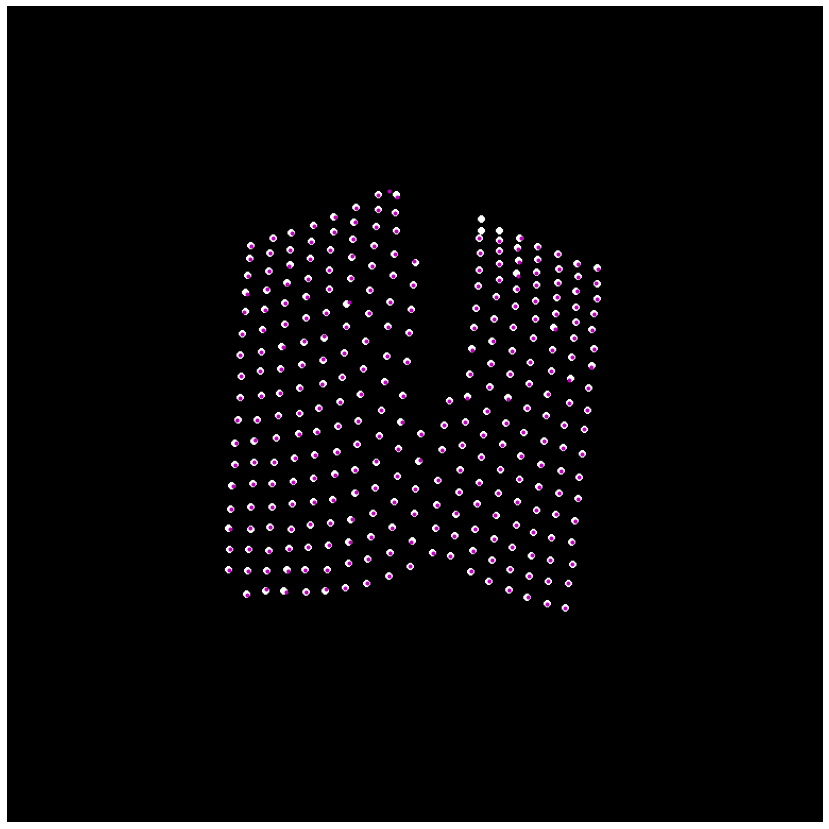

In [16]:
plt.imshow(img_5_mask, cmap="gray")
plt.plot(laser_peaks[:, 1], laser_peaks[:, 0], 'mo', markersize=3)
plt.axis('off')
plt.savefig('results/laser_map.jpg')